In [1]:
# USD/NOK valutakurs fra Norges Bank

import requests
import pandas as pd

# Henter valutakurs-data (USD/NOK) daglig fra 2000 til 2025
url = "https://data.norges-bank.no/api/data/EXR/B.USD.NOK.SP?format=sdmx-json&startPeriod=2000-01-01&endPeriod=2025-04-08"
response = requests.get(url)
data = response.json()

# Henter datoer og observasjoner
dates = data['data']['structure']['dimensions']['observation'][0]['values']
series_key = list(data['data']['dataSets'][0]['series'].keys())[0]
observations = data['data']['dataSets'][0]['series'][series_key]['observations']

# Pakker data til liste
records = []
for key, val in observations.items():
    date = dates[int(key)]['id']
    rate = val[0]
    records.append((date, rate))

# Lager DataFrame
df = pd.DataFrame(records, columns=["Dato", "USD/NOK"])
df["Dato"] = pd.to_datetime(df["Dato"])
df["USD/NOK"] = pd.to_numeric(df["USD/NOK"])

# Filtrer kun fredager for å kun få én verdi per uke (slik som lakseeksportdata)
df["Ukedag"] = df["Dato"].dt.weekday  # Mandag=0, Fredag=4
df_fredag = df[df["Ukedag"] == 4].copy()

# Legger til ukenummer
df_fredag["Ukenr."] = df_fredag["Dato"].dt.isocalendar().week

# Rekkefølge: Ukenr., Dato, USD/NOK
df_fredag = df_fredag[["Ukenr.", "Dato", "USD/NOK"]]

# Sorter etter uke og dato
df_fredag = df_fredag.sort_values(by=["Dato"])


print(df_fredag)


      Ukenr.       Dato  USD/NOK
4          1 2000-01-07   7.9682
9          2 2000-01-14   7.9575
14         3 2000-01-21   7.9994
19         4 2000-01-28   8.1682
24         5 2000-02-04   8.2186
...      ...        ...      ...
6341      10 2025-03-07  10.8308
6346      11 2025-03-14  10.6713
6351      12 2025-03-21  10.5302
6356      13 2025-03-28  10.4603
6361      14 2025-04-04  10.5648

[1274 rows x 3 columns]


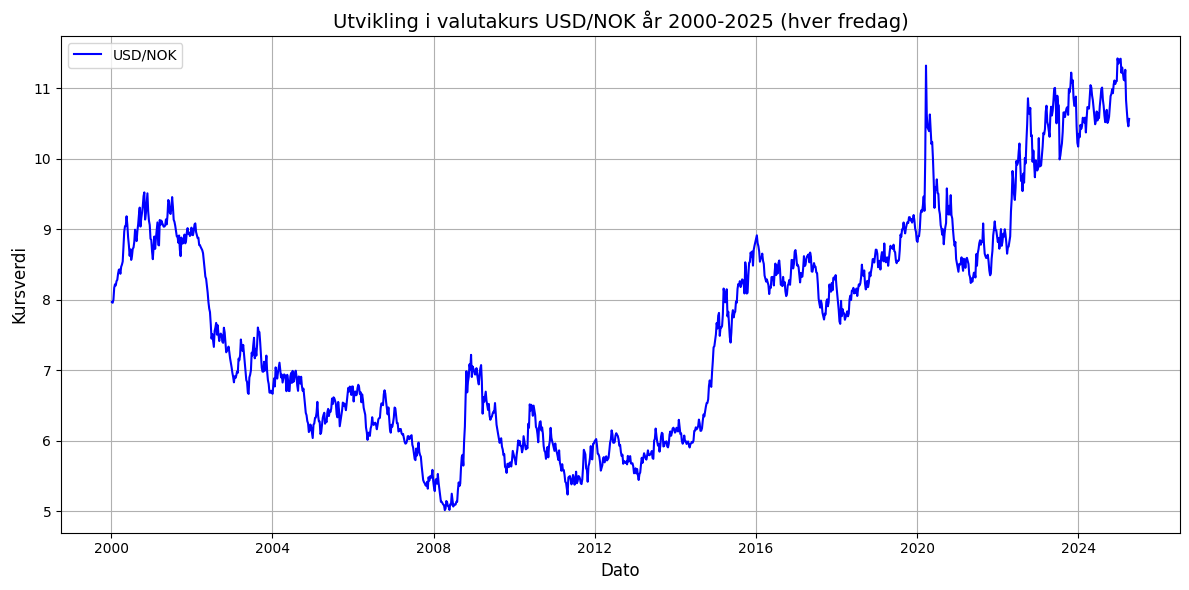

In [2]:
# Plotter utvikling i USD/NOK

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_fredag["Dato"], df_fredag["USD/NOK"], label="USD/NOK", color="blue")

plt.title("Utvikling i valutakurs USD/NOK år 2000-2025 (hver fredag)", fontsize=14)
plt.xlabel("Dato", fontsize=12)
plt.ylabel("Kursverdi", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# EUR/NOK valutakurs fra Norges Bank

import requests
import pandas as pd

# Henter valutakurs-data (EUR/NOK) daglig fra 2000 til 2025
url = "https://data.norges-bank.no/api/data/EXR/B.EUR.NOK.SP?format=sdmx-json&startPeriod=2000-01-01&endPeriod=2025-04-08&locale=no"
response = requests.get(url)
data = response.json()

# Henter datoer og observasjoner
dates = data['data']['structure']['dimensions']['observation'][0]['values']
series_key = list(data['data']['dataSets'][0]['series'].keys())[0]
observations = data['data']['dataSets'][0]['series'][series_key]['observations']

# Pakker data til liste
records = []
for key, val in observations.items():
    date = dates[int(key)]['id']
    rate = val[0]
    records.append((date, rate))

# Lager DataFrame
df = pd.DataFrame(records, columns=["Dato", "EUR/NOK"])
df["Dato"] = pd.to_datetime(df["Dato"])
df["EUR/NOK"] = pd.to_numeric(df["EUR/NOK"])

# Filtrer kun fredager for å kun få én verdi per uke (slik som lakseeksportdata)
df["Ukedag"] = df["Dato"].dt.weekday  # Mandag=0, Fredag=4
df_fredag = df[df["Ukedag"] == 4].copy()

# Legger til ukenummer
df_fredag["Ukenr."] = df_fredag["Dato"].dt.isocalendar().week

# Rekkefølge: Ukenr., Dato, USD/NOK
df_fredag = df_fredag[["Ukenr.", "Dato", "EUR/NOK"]]

# Sorter etter uke og dato
df_fredag = df_fredag.sort_values(by=["Dato"])


print(df_fredag)


      Ukenr.       Dato  EUR/NOK
4          1 2000-01-07   8.1945
9          2 2000-01-14   8.1365
14         3 2000-01-21   8.0770
19         4 2000-01-28   8.0440
24         5 2000-02-04   8.0830
...      ...        ...      ...
6341      10 2025-03-07  11.7590
6346      11 2025-03-14  11.6200
6351      12 2025-03-21  11.4010
6356      13 2025-03-28  11.2940
6361      14 2025-04-04  11.6815

[1274 rows x 3 columns]


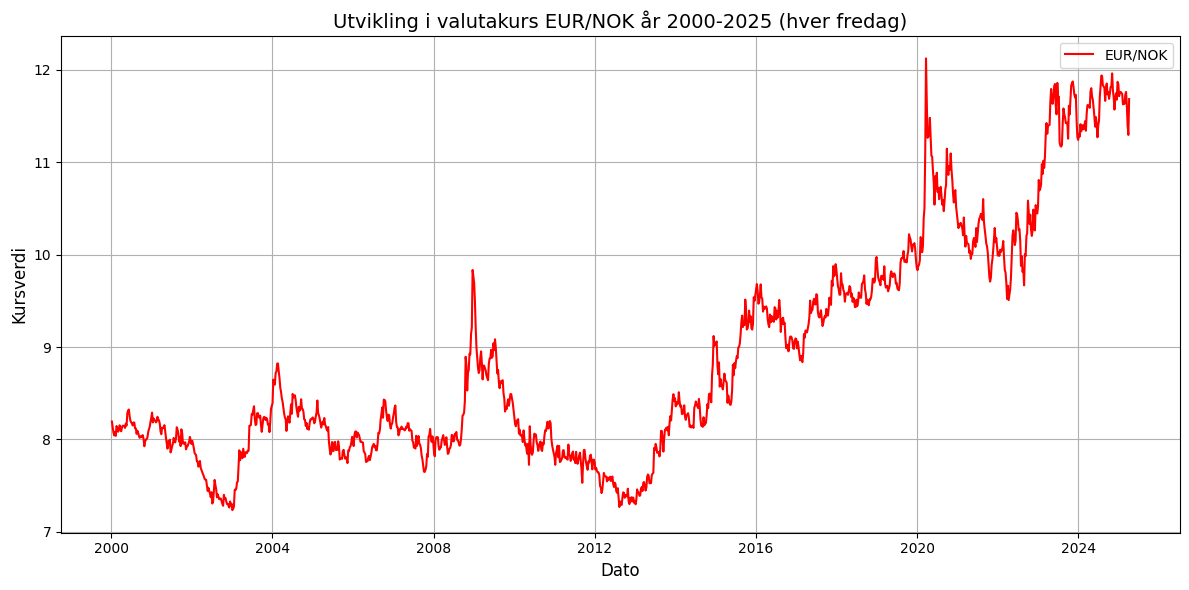

In [ ]:
# Plotter utvikling i EUR/NOK

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_fredag["Dato"], df_fredag["EUR/NOK"], label="EUR/NOK", color="red")

plt.title("Utvikling i valutakurs EUR/NOK år 2000-2025 (hver fredag)", fontsize=14)
plt.xlabel("Dato", fontsize=12)
plt.ylabel("Kursverdi", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

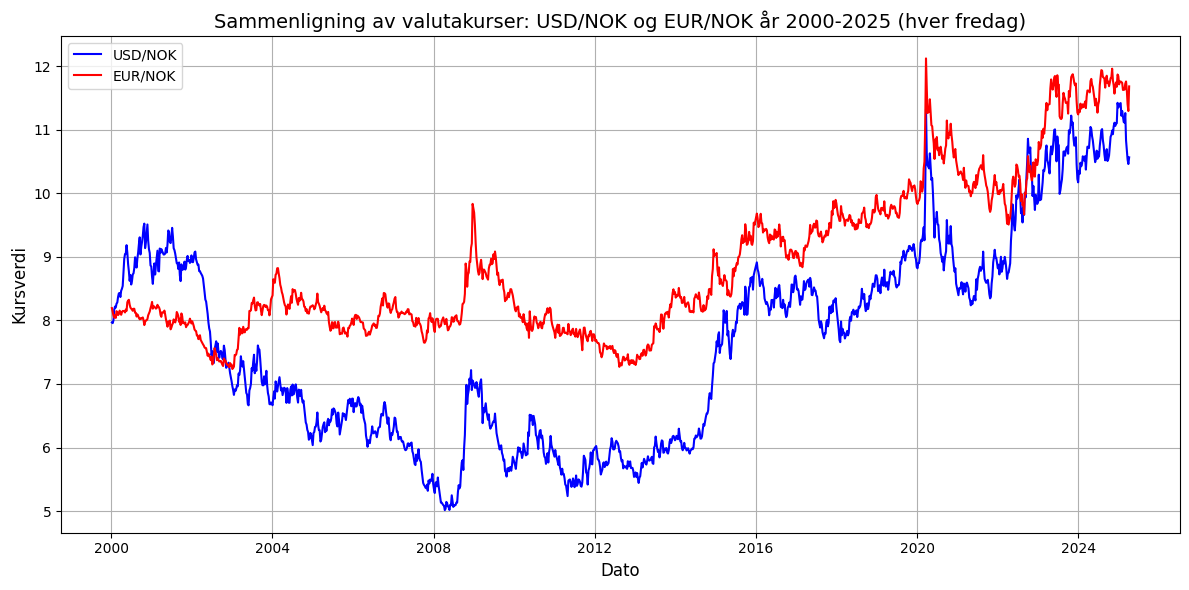

In [ ]:
# Sammenligner valuttakursene

import requests
import pandas as pd
import matplotlib.pyplot as plt

def hent_valutakurs(valutapar, kolonnenavn):
    url = f"https://data.norges-bank.no/api/data/EXR/B.{valutapar}.SP?format=sdmx-json&startPeriod=2000-01-01&endPeriod=2025-04-08&locale=no"
    response = requests.get(url)
    data = response.json()

    dates = data['data']['structure']['dimensions']['observation'][0]['values']
    series_key = list(data['data']['dataSets'][0]['series'].keys())[0]
    observations = data['data']['dataSets'][0]['series'][series_key]['observations']

    records = []
    for key, val in observations.items():
        date = dates[int(key)]['id']
        rate = val[0]
        records.append((date, rate))

    df = pd.DataFrame(records, columns=["Dato", kolonnenavn])
    df["Dato"] = pd.to_datetime(df["Dato"])
    df[kolonnenavn] = pd.to_numeric(df[kolonnenavn])
    df["Ukedag"] = df["Dato"].dt.weekday
    df = df[df["Ukedag"] == 4].copy()
    return df[["Dato", kolonnenavn]].sort_values("Dato")

# Hent begge valutakursene
df_usd = hent_valutakurs("USD.NOK", "USD/NOK")
df_eur = hent_valutakurs("EUR.NOK", "EUR/NOK")

# Slå sammen på dato
df_sammen = pd.merge(df_usd, df_eur, on="Dato", how="inner")

# Plot begge på samme graf
plt.figure(figsize=(12, 6))
plt.plot(df_sammen["Dato"], df_sammen["USD/NOK"], label="USD/NOK", color="blue")
plt.plot(df_sammen["Dato"], df_sammen["EUR/NOK"], label="EUR/NOK", color="red")

plt.title("Sammenligning av valutakurser: USD/NOK og EUR/NOK år 2000-2025 (hver fredag)", fontsize=14)
plt.xlabel("Dato", fontsize=12)
plt.ylabel("Kursverdi", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


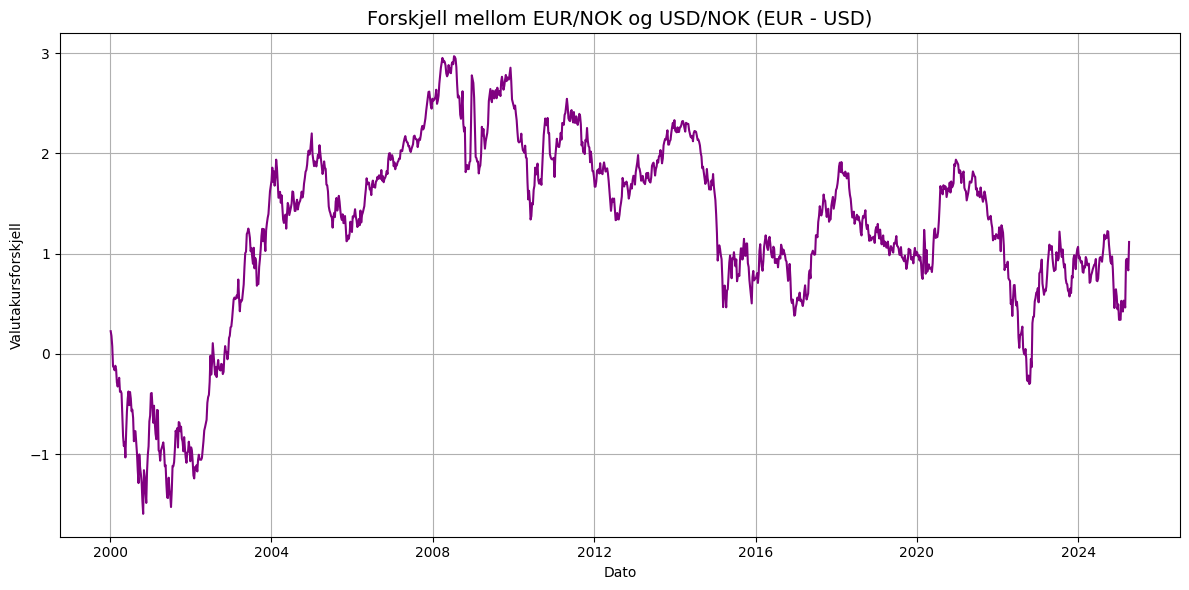

In [ ]:
# Visualiserer differansen mellom EUR/NOK og USD/NOK

df_sammen["Differanse"] = df_sammen["EUR/NOK"] - df_sammen["USD/NOK"]

plt.figure(figsize=(12, 6))
plt.plot(df_sammen["Dato"], df_sammen["Differanse"], color="purple")
plt.title("Forskjell mellom EUR/NOK og USD/NOK (EUR - USD)", fontsize=14)
plt.xlabel("Dato")
plt.ylabel("Valutakursforskjell")
plt.grid(True)
plt.tight_layout()
plt.show()
